<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/7.05.2024/UnderHood2_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List, array tensor

In [51]:
from fastai.vision.all import *

data = [[1,2,3],[4,5,6]] # nested list
arr = array(data) # numpy array
tns = tensor(data) # torch tensor


In [52]:
data

[[1, 2, 3], [4, 5, 6]]

In [53]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

**Model aniqligini broadcasting orqali aniqlash**

In [55]:
path = untar_data(URLs.MNIST_SAMPLE)


In [56]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [57]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [58]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

(<Axes: >, <Axes: >)

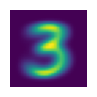

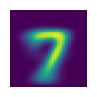

In [59]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7)

In [60]:
s_3 = stacked_threes[1]
s_7 = stacked_sevens[1]

In [61]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

MAE ni hisonlashni funksiyaga aylantiramiz!

In [62]:
# mae xatolik funksiyasi!
def mae(a, b):
  return (a-b).abs().mean((-1,-2))

# tekshirish
mae(s_3, mean3)


valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)


valid_3_errors, valid_3_errors.shape


(tensor([0.1381, 0.1414, 0.1403,  ..., 0.1424, 0.1162, 0.1587]),
 torch.Size([1010]))

# natijalovchi funksiya

In [63]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [64]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [65]:
def loss(w):
  return w**2

In [66]:
def plot_function(loss, min, max):
  w = np.linspace(-5, 5, 100)
  plt.plot(w, loss(w))

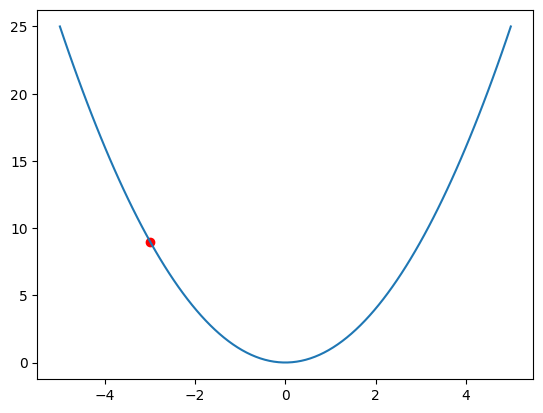

In [70]:
plot_function(loss, 'w', 'loss')
plt.scatter(-3, loss(-3), color='red')

In [68]:
# tangent line of parabola
def parabola_tangent_liner()

SyntaxError: expected ':' (<ipython-input-68-3fc04d9a7c9d>, line 2)

In [69]:
parabola_tangent_liner(-3)

NameError: name 'parabola_tangent_liner' is not defined

In [71]:
w_t = torch.tensor(3., requires_grad=True)
w_t

tensor(3., requires_grad=True)

In [72]:
loss_v = loss(w_t)
loss_v

tensor(9., grad_fn=<PowBackward0>)

In [73]:
loss_v.backward()

In [74]:
w_t.grad

tensor(6.)

# step with learning rate



1.   `w = w + lr*w.grad`
2.   `w = w - lr*w.grad`



In [97]:
lr  = 1e-5

In [98]:
w = w_t + lr*(w_t.grad)
w

tensor(3.0001, grad_fn=<AddBackward0>)

In [77]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [78]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([69.5084, 57.2810, 41.6253, 34.8357, 20.8045, 14.7251,  9.4898,  9.4913,
         3.1408,  4.7814, -1.9205,  4.5698,  7.4872, 13.9565, 12.6154, 20.0091,
        34.0765, 39.6207, 58.8328, 69.7320])

Text(0.5, 1.0, 'Roller Coaster Tezligi')

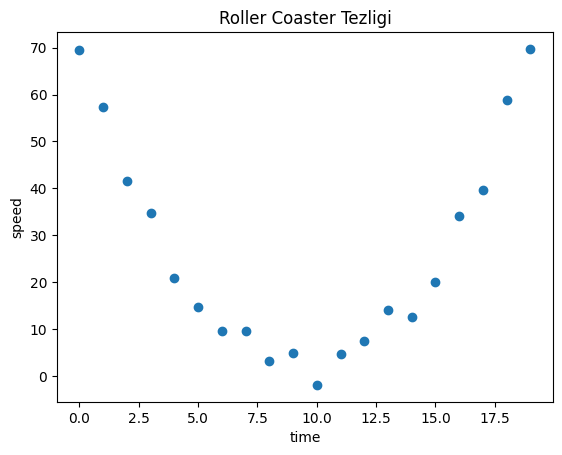

In [79]:
plt.scatter(time, speed)
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Roller Coaster Tezligi')

In [80]:
def f(t, params):
  ''' quadratic function'''
  a, b, c = params
  return a*(t**2) + (b*t) + c

In [81]:
# loss function

def mse (preds, targets):
  return ((preds-targets)**2).mean()

# 7 ta step bor!

*  1 Initialize (Vaznlarni boshlang'ich qiymatini yaratib olish)

In [83]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.6538,  0.3997, -1.4243], requires_grad=True)

* 2 Prediction (Bashorat)

In [84]:
preds = f(time, params)
preds

tensor([  -1.4243,   -1.6784,   -3.2401,   -6.1094,  -10.2863,  -15.7709,
         -22.5630,  -30.6628,  -40.0702,  -50.7851,  -62.8077,  -76.1379,
         -90.7757, -106.7211, -123.9741, -142.5347, -162.4030, -183.5788,
        -206.0622, -229.8533], grad_fn=<AddBackward0>)

In [91]:
def show_preds(preds, ax=None):
   plt.scatter(time, speed, label='speed')
   plt.scatter(time, to_np(preds), label='preds')
   plt.legend()


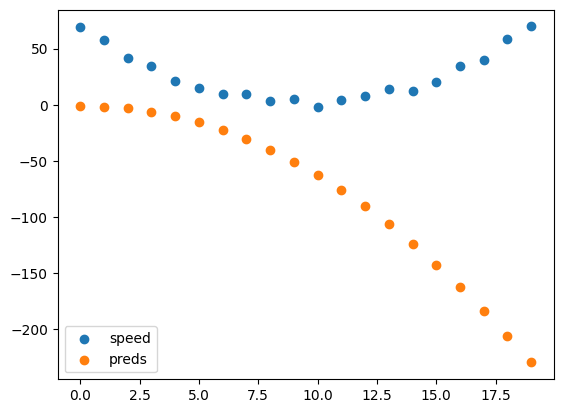

In [92]:
show_preds(preds)

* 3 Loss ni baholash

In [93]:
loss = mse(preds, speed)
loss

tensor(17477.3965, grad_fn=<MeanBackward0>)

* 4 Gradientni hisoblash

In [95]:
loss.backward()
params.grad

tensor([-43477.6875,  -2786.0874,   -209.2101])

* 5 Step

In [96]:
lr  = 1e-5
params.data -= lr*params.grad.data
params.grad = None

* 6. 2 chi qadamga qaytib yana bashoratni amalga oshirish

In [100]:
preds = f(time, params)
#yangi olingan bashorat uchun xatolikni xisoblash
mse(preds, speed)

tensor(3858.3589, grad_fn=<MeanBackward0>)

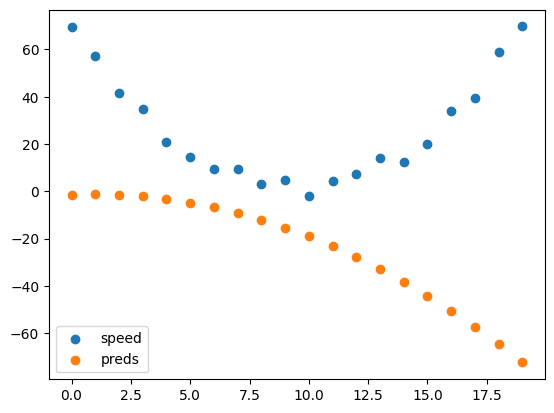

In [101]:
show_preds(preds)

In [102]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn:
    print(loss.item())
  return preds

* 7. Istalgan epoch`gacha modelni o'qitish

In [115]:
for epoch in range(100):
  apply_step(params)

567.21728515625
567.2144165039062
567.2114868164062
567.2086181640625
567.2056884765625
567.2027587890625
567.1998291015625
567.1968994140625
567.1940307617188
567.191162109375
567.1882934570312
567.1853637695312
567.1824951171875
567.1795043945312
567.1766357421875
567.1737670898438
567.1708374023438
567.16796875
567.1650390625
567.162109375
567.1593017578125
567.15625
567.1534423828125
567.1505126953125
567.1475830078125
567.144775390625
567.141845703125
567.1388549804688
567.1360473632812
567.1331176757812
567.1302490234375
567.1272583007812
567.1243896484375
567.1215209960938
567.11865234375
567.1157836914062
567.11279296875
567.10986328125
567.1069946289062
567.1040649414062
567.1011962890625
567.0983276367188
567.0953369140625
567.0924682617188
567.0895385742188
567.0866088867188
567.0836791992188
567.0809326171875
567.0780029296875
567.0751342773438
567.0721435546875
567.0692138671875
567.0662841796875
567.0634765625
567.060546875
567.0576782226562
567.0547485351562
567.05181884

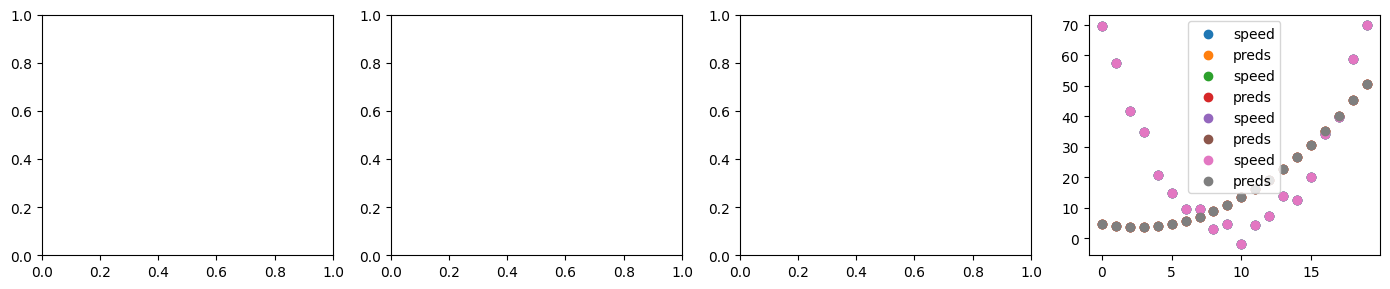

In [116]:
_, axs = plt.subplots(1, 4, figsize=(14, 3))

for ax in axs:
  show_preds(apply_step(params, prn=False), ax)

plt.tight_layout()

Gradient Descent(GD), Stochastic Gradient Descent(SGD), Mini-batch